# 1장 텍스트 유사도

## 1.1 텍스트 유사도 개요

챗봇 개발에 대한 여러 방법론 중, 저희는 특정 분야에 적용되는 FAQ에 응대하는 **Q&A 챗봇 개발**을 다루고 있습니다. 때문에 챗봇 엔진에 입력되는 문장과 시스템에서 해당 주제의 답변과 연관되어 있는 질문이 얼마나 유사한지 계산할 수 있어야 적절한 답변을 출력할 수 있습니다.

**따라서 이번 챕터에서는 두 문장이 얼마나 유사한지 알아보는 텍스트 유사도에 대해 배워봅시다!**


자연어 처리에서 문장 간에 의미가 얼마나 유사한지 계산하는 일은 매우 중요합니다. 컴퓨터에서 두 문장 간의 유사도를 계산하는 방법은 지난 4장에서 배운 *임베딩*으로 각 단어들의 벡터를 구한 다음 벡터 간의 거리를 계산하는 방법으로 단어 간의 의미가 얼마나 유사한지 계산할 수 있고, 더 확장하여 문장 간의 유사도 또한 계산할 수 있습니다.


이처럼 두 문장 간의 유사도를 계산하기 위해서는 문장 내에 존재하는 단어들을 수치화해야 하는데, 이때 언어 모델에 따라 **통계를 이용하는 방법**과 **인공 신경망을 이용하는 방법**(e.g. Word2Vec)으로 나눌 수 있습니다.

이 챕터에서는 **통계적인 방법**을 이용해 유사도를 계산하는 방법에 대해 한번 알아봅시다!

## 1.2 n-gram 유사도

**n-gram**은 주어진 문장에서 n개의 연속적인 단어 시퀀스(나열)를 의미합니다. 이때 문장에서 n개의 단어를 토큰으로 사용하고, 이웃한 단어의 출현 횟수를 통계적으로 표현해 텍스트의 유사도를 계산합니다. 

서로 다른 문장을 n-gram으로 비교하면 단어의 출현 빈도에 기반한 유사도를 계산할 수 있습니다. 
<br>
<br>

#### n-gram 종류
- n=1: 1-gram 또는 유니그램
- n=2: 2-gram 또는 바이그램
- n=3: 3-gram 또는 트라이그램
- n>=4: 숫자만 앞쪽에 붙여 부름
<br>
<br>

#### n-gram을 이용해 문장 간 유사도 계산 방법
1. 해당 문장을 n-gram으로 토큰을 분리한 후 **단어 문서 행렬(Term-Document Matrix, DTM)**을 만듭니다.
2. 두 문장을 서로 비교해 동일한 단어의 출현 빈도를 확률로 계산해 유사도를 구합니다.
  - 두 문장 A, B가 있을 때 B가 A와 얼마나 유사한 지 확률을 구하는 수식: $similarity=tf(A,B)$ $/$ $tokens(A)$
  
  - $tf(term$ $frequency)$: 두 문장 A와 B에서 동일한 토큰의 출현 빈도를 의미합니다.
  - $tokens$: 해당 문장에서 전체 토큰 수를 의미합니다.
  
  ➡️ 즉, 기준이 되는 문장 A에서 나온 전체 토큰 중에서 A와 B에서 동일한 토큰이 얼마나 있는지 비율로 표현한 수식이며, 1.0에 가까울 수록 B가 A에 유사하다고 볼 수 있습니다.
<br>


#### 2-gram을 이용한 두 문장의 유사도 계산 예시
```
A: 6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.
B: 6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.
```

다음 표는 두 문장을 단어 문서 행렬로 표현한 것입니다. 
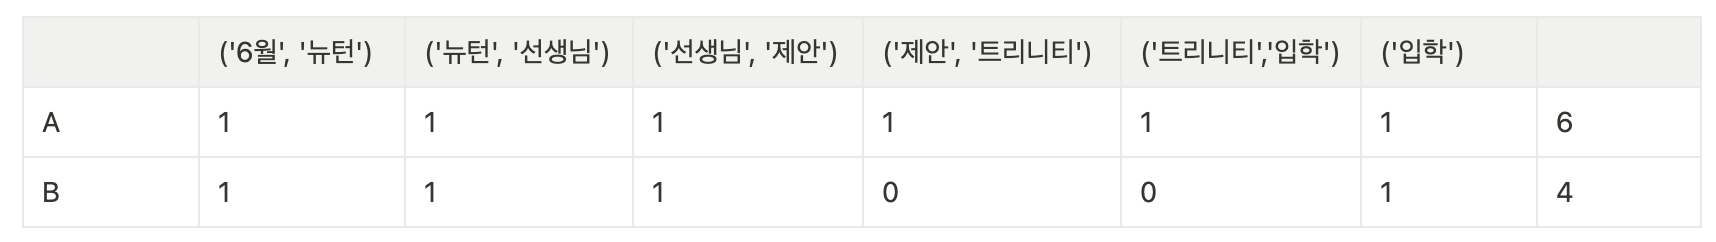

- 열: 문장 A의 2-gram 토큰값입니다.

- 행: 문장 A와 B로 구성되어 있습니다.


열에 나열된 토큰들이 문장 A와 B에 얼만큼 출현되는지 나타내고 있습니다. 문장 A에서는 당연히 6개의 토큰이 전부 나오고, 문장 B에서는 동일한 토큰이 4개 카운트 되었습니다.
  - $tokens(A)$ = 6
  - $tf(A,B)$ = 4

앞선 n-gram 유사도 수식에 따르면 두 문장의 유사도 $similarity=4/6$으로 0.66의 유사도를 지닙니다. 즉, 문장 B는 문장 A와 66% 유사하다고 볼 수 있습니다.


<br>

#### 2-gram 유사도 계산 코드
n-gram의 개념을 정리했으니, 실제로 작동하는 코드를 통해 3개 문장 간의 유사도를 계산해봅시다!

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 18.8 MB/s 


In [ ]:
from konlpy.tag import Komoran

# 어절 단위 n-gram
def word_ngram(bow, num_gram):
    text = tuple(bow)
    ngrams = [text[x:x + num_gram] for x in range(0, len(text))]
    return tuple(ngrams)

```word_ngram```은 어절 단위로 n-gram 토큰을 추출하는 함수입니다. 슬라이싱을 이용해 문장을 어절 단위로 n개씩 끊어서 토큰을 저장하고, 추출된 토큰들은 튜플 형태로 반환됩니다.

In [ ]:
# 유사도 계산
def similarity(doc1, doc2):
    cnt = 0
    for token in doc1:
        if token in doc2:
            cnt = cnt + 1
    return cnt/len(doc1)

```similarity``` 함수는 doc1의 토큰이 doc2의 토큰과 얼마나 동일한지 횟수를 카운트 합니다. 카운트된 값을 doc1의 전체 토큰 수로 나누면 유사도가 계산됩니다.

In [ ]:
# 문장 정의
sentence1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었다.'

# 형태소 분석기에서 (명사)단어 추출
komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

Komoran 형태소 분석기를 이용해 정의된 문장에서 명사를 리스트 형태로 추출합니다. 

In [ ]:
# 단어 n-gram 토큰 추출
doc1 = word_ngram(bow1, 2) # 2-gram 방식으로 추출
doc2 = word_ngram(bow2, 2)
doc3 = word_ngram(bow3, 2)

# 추출된 n-gram 토큰 출력
print(doc1)
print(doc2)

(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '트리니티'), ('트리니티', '입학'), ('입학',))
(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '대학교'), ('대학교', '입학'), ('입학',))


word_gram() 함수를 이용해 명사 리스트의 n-gram 토큰을 추출합니다. 여기서 word_ngram() 함수의 ```num_gram``` 인자에 2를 입력했으므로 2-gram 방식으로 토큰을 추출합니다.

In [ ]:
# 유사도 계산
r1 = similarity(doc1, doc2)
r2 = similarity(doc3, doc1)

# 계산된 유사도 출력
print(r1)
print(r2)

0.6666666666666666
0.0


문장1(doc1)과 문장2(doc2)의 유사도 계산 결과 0.66이고, 문장3(doc3)과 문장1(doc2)의 유사도 계산 결과 두 문장으 연관성이 전혀 없으므로 유사도가 0으로 계산됩니다.


<br>
<br>

### n-gram 특징
- 문장에 존재하는 모든 단어의 출현 빈도를 확인하는 것이 아니라 연속되는 문장에서 일부 단어(n으로 설정된 개수만큼)만 확인하다 보니 **전체 문장을 고려한 언어 모델보다 정확도가 떨어질 수 있습니다.**
- n을 크게 잡을수록 비교 문장의 토큰과 비교할 때 카운트를 놓칠 확률이 커집니다.
- 반대로 n을 작게 잡을수록 카운트 확률은 높아지지만 문맥을 파악하는 정확도는 떨어집니다.

=> 따라서 n-gram에서 **n의 설정은 매우 중요**하고, 보통 **1-5사이**의 값을 많이 사용합니다.

## 1.3 코사인 유사도

#### 코사인 유사도 개념
두 벡터 간 코사인 각도를 이용해 유사도를 측정하는 방법으로, 벡터의 크기가 중요하지 않을 때 거리를 측정하기 위해 사용합니다. 

예를 들어, 단어의 출현 빈도를 통해 유사도 계산을 한다면 동일한 단어가 많이 포함되어 있을수록 벡터의 크기가 커집니다.

#### n-gram 유사도와 코사인 유사도의 차이
- n-gram 유사도: 벡터의 크기가 커지면 유사도 결과에 안 좋은 영향을 미침

- 코사인 유사도: 벡터의 크기와 상관 없이 결과가 안정적


#### 코사인 유사도 특징
- 1~1 사이 값을 가진다.
- 동일 방향: 1
- 직각: 0
- 반대 방향: -1

=> 즉, 두 벡터의 방향이 같아질수록 유사하다 볼 수 있습니다.


#### 코사인 유사도 수식

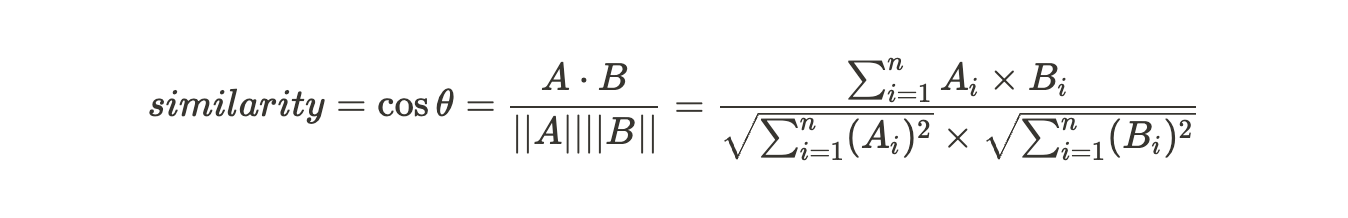

공간 벡터의 내적과 크기를 이용해 코사인 각도를 계산한다는 것을 알 수 있습니다.
<br>

#### 코사인 유사도 예시

아래 두 문장을 통해 코사인 유사도를 계산하는 과정을 살펴보겠습니다.

```
A: 6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.
B: 6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.
```

다음은 문장 A와 B에서 단어 토큰(명사)만 추출하여 단어 문서 행렬을 표현한 표입니다.

각 문장에서 토큰이 나올 때마다 +1씩 카운트했습니다.

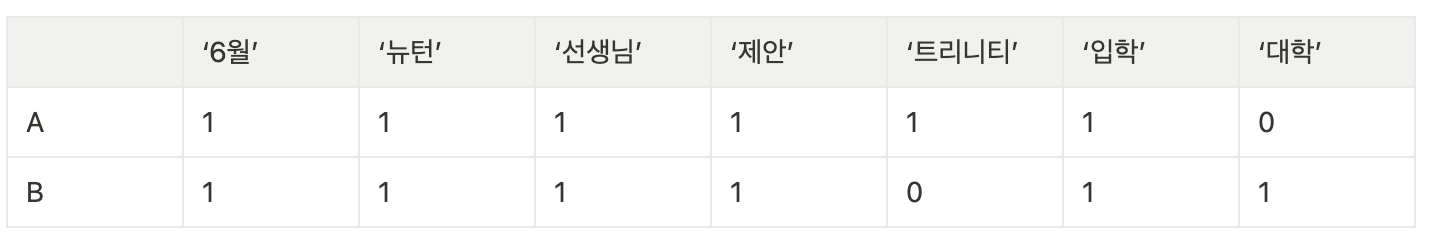


1) 우선 앞의 코사인 유사도 수식의 분자를 계산합니다. (두 벡터의 내적을 의미)


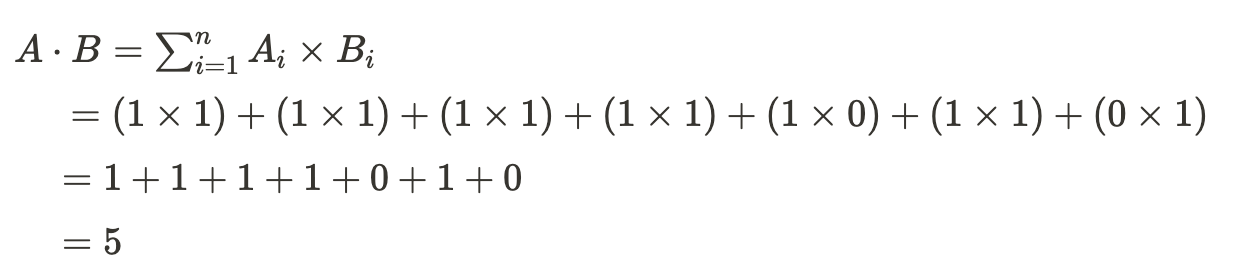
<br>

2) 다음으로 코사인 유사도 수식의 분모를 계산합니다. (두 벡터의 크기의 곱을 의미)

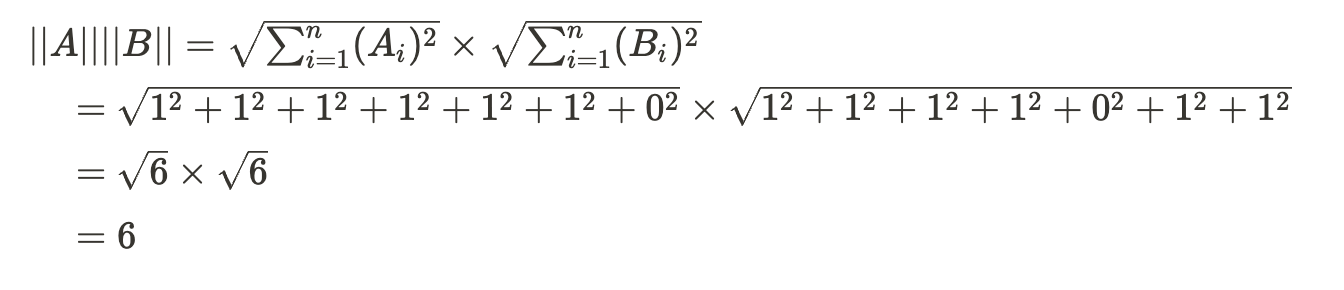

<br>

3) 문장 A와 B의 코사인 유사도

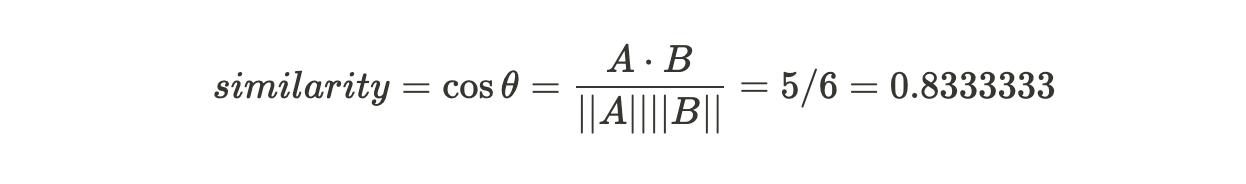

두 문장은 83%의 유사성을 갖고 있는 것을 확인할 수 있습니다.




#### 코사인 유사도 계산 코드
코사인 유사도에 대한 개념을 정리했으니, n-gram 유사도 실습과 동일하게 실제로 작동하는 코드를 통해 3개 문장 간의 유사도를 계산해봅시다!

In [ ]:
from konlpy.tag import Komoran
import numpy as np
from numpy import dot
from numpy.linalg import norm 

#코사인 유사도 계산
def cos_sim(vec1,vec2):
	return dot(vec1, vec2) / (norm(vec1)*norm(vec2))


코사인 유사도를 계산하는 함수로, 넘파이에서 제공하는 벡터 내적을 계산하는 함수와 노름을 계산하는 함수를 이용합니다.

코사인 유사도에서는 주로 L2 노름(유클리드 노름)을 주로 사용하고, 그 수식은 다음과 같습니다

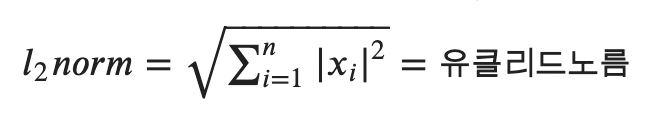

In [ ]:
#TDM 만들기
def make_term_doc_mat(sentence_bow, word_dics):
    freq_mat = {}

    for word in word_dics:
        freq_mat[word] = 0

    for word in word_dics:
        if word in sentence_bow:
            freq_mat[word] += 1
    
    return freq_mat

비교 문장에서 추출한 단어 사전을 기준으로 문장에 해당 단어들이 얼마나 포함되어 있는지 나타내는 단어 문서 행렬(TDM)을 만들어줍니다.

In [ ]:
#단어 벡터 만들기 
def make_vector(tdm):
    vec = []
    for key in tdm: 
        vec.append(tdm[key])
    return vec

단어 문서 행렬에서 표현된 토큰들의 출현 빈도 데이터를 벡터로 만들어주는 함수입니다.

In [ ]:
#문장 정의 
sentence1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었다.'

#형태소 분석기를 이용해 단어 묶음 리스트 생성
komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

Komoran 형태소 분석기를 통해 각 문장에서 명사를 리스트 형태로 추출합니다.

In [ ]:
#단어 묶음 리스트를 하나로 합침
bow = bow1 + bow2 + bow3

#단어 묶음에서 중복을 제거해 단어 사전 구축
word_dics = []
for token in bow: 
    if token not in word_dics:
        word_dics.append(token)

문장별로 추출된 단어 리스트를 하나의 리스트로 합친 후 중복된 단어를 제거해 새로운 단어 사전 리스트를 구축합니다.

In [ ]:
#문장별 단어 문서 행렬 계산
freq_list1 = make_term_doc_mat(bow1, word_dics)
freq_list2 = make_term_doc_mat(bow2, word_dics)
freq_list3 = make_term_doc_mat(bow3, word_dics)
print(freq_list1)
print(freq_list2)
print(freq_list3)

{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 1, '입학': 1, '대학교': 0, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 0, '입학': 1, '대학교': 1, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 0, '뉴턴': 1, '선생님': 0, '제안': 0, '트리니티': 0, '입학': 0, '대학교': 0, '밥': 1, '선생': 1, '님과 함께': 1}


각 문장마다 단어 문장 행렬 리스트를 만든 후 출력한 결과입니다.

In [ ]:
#문장 벡터 생성
doc1 = np.array(make_vector(freq_list1))
doc2 = np.array(make_vector(freq_list2))
doc3 = np.array(make_vector(freq_list3))

#코사인 유사도 계산
r1 = cos_sim(doc1, doc2)
r2 = cos_sim(doc3, doc1)
print(r1)
print(r2)

0.8333333333333335
0.20412414523193154


각 문장마다 벡터를 생성한 후 코사인 유사도 함수의 인자로 넘기기 위해 **넘파이 배열**로 변환합니다.

코사인 유사도 계산 결과, 문장1(doc1)과 문장2(doc2)의 유사도는 0.83으로 n-gram 유사도 방식보다 정확도가 높게 나왔고, 또한 의미가 전혀 다른 문장3(doc3)과 문장1(doc1)의 유사도는 0.20으로 낮게 나왔습니다.

이는 의미상 연관성은 없었지만 '뉴턴'과 '선생님'이라는 단어가 문장1과 문장3에 포함되어 있기 때문에 작게나마 유사도가 측정된 것입니다.

=> **코사인 유사도가 n-gram 유사도에 비해 성능상 이점이 많은 것을 확인**할 수 있습니다.


## 마치며

이번 시간에는 텍스트의 유사도를 비교할 때 코사인 유사도가 n-gram 유사도보다 더 좋은 성능을 보인다는 것을 직접 확인해볼 수 있었습니다!

다음 시간에는 ***챗봇 엔진에 필요한 딥러닝 모델(CNN, LSTM 등)***에 대해 살펴보며 챗봇 구현에 조금 더 가까워지는 시간을 가져보도록 하겠습니다!

감사합니다😊